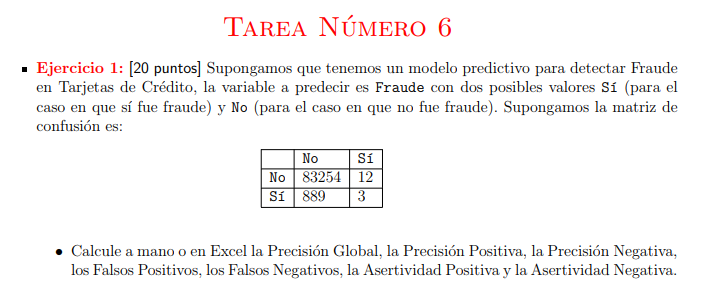

## Precisión global

### (VN + VP) / (VN + FP + FN + VP) 

### (83254 + 3) / (83254 + 12 +889 + 3)

### 0.9892

## Precisión positiva

### VP / FN + VP

### 3 / 889 + 3

### 0.003

## Precisión negativa

### (VN) / (VN + FP) 

### 83254 / (83254 + 12)

### 0.9998

## Precisión falsos positivos

### (FP) / (VN + FP) 

### 12 / (83254 + 12)

### 1.44

## Precisión falsos negativos

### FN  /  (FN + VP)

### 889 / 889 + 3

### 0.985

## Asertividad Positiva

### VP / (FP + VP) 

### 3 / (12 + 3)

### 0.2

## Asertividad Negativa

### VN / (FN + VN) 

### 83254 / (889 + 83254)

### 0.989

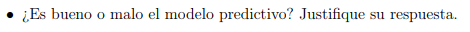

### A pesar de que tiene una precisión alta, lo escencial de un modelo predicitvo para fraude es que tenga una asertividad alta en los casos que son fraude para poder detenerlo, y el de este modelo es bastante bajo, ademas hay un importante numero de casos que no corresponden a fraude que son detectados erroneamente como fraude, esto es muy peligroso ya que se pueden cortar transacciones muy importantes para clientes que no han cometido fraude.

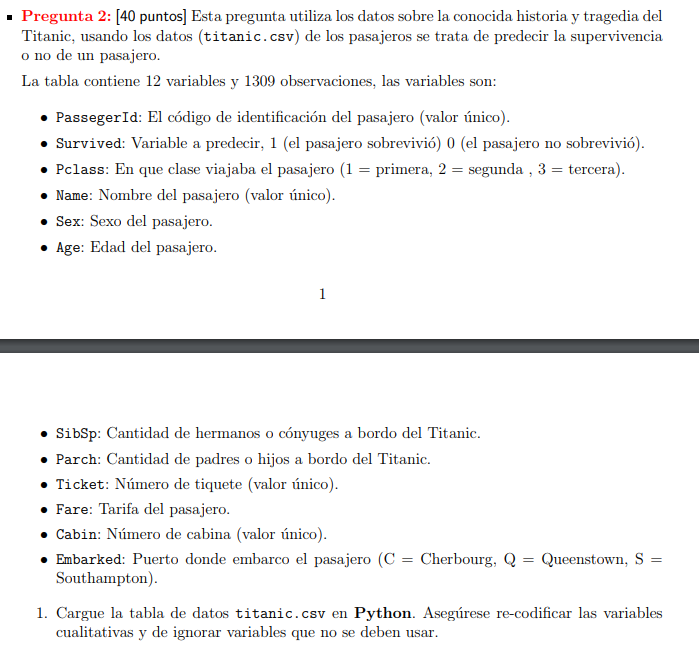

In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import math
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

os.chdir("/Users/Andrey/Desktop/Data-Science-Course/VII Lecture")

pd.set_option('display.max_rows', 1000)

datos = pd.read_csv('Titanic.csv',delimiter=',',decimal=".",index_col=0)

def recodificar(col, nuevo_codigo):
  col_cod = pd.Series(col, copy=True)
  for llave, valor in nuevo_codigo.items():
    col_cod.replace(llave, valor, inplace=True)
  return col_cod

datos["Sex"] = recodificar(datos["Sex"], {'male':0, 'female':1})
datos["Embarked"] = recodificar(datos["Embarked"], {'C':1, 'Q':2,'S':3})

del[datos["Name"]]
del[datos["Ticket"]]
del[datos["Fare"]]
del[datos["Cabin"]]
del[datos["Age"]]

print(datos.head())


             Survived  Pclass  Sex  SibSp  Parch  Embarked
PassengerId                                               
1                   0       3    0      1      0         3
2                   1       1    1      1      0         1
3                   1       3    1      0      0         3
4                   1       1    1      1      0         3
5                   0       3    0      0      0         3


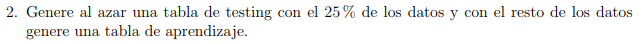

In [16]:
# Se dejan las variables predictorias en una tabla

X = datos.iloc[:,1:] 
print(X.head())

             Pclass  Sex  SibSp  Parch  Embarked
PassengerId                                     
1                 3    0      1      0         3
2                 1    1      1      0         1
3                 3    1      0      0         3
4                 1    1      1      0         3
5                 3    0      0      0         3


In [17]:
# Se separa las variablea a predecir

y = datos.iloc[:,0:1] 
print(y.head())

             Survived
PassengerId          
1                   0
2                   1
3                   1
4                   1
5                   0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

print("========Tabla de entrenamiento========")

print(X_train.head())


print("========Tabla de test========")

print(X_test.head())

print("========Tabla de entrenamiento a predecir========")

print(y_train.head())


print("========Tabla de test a predecir========")

print(y_test.head())

========Tabla de entrenamiento========
             Pclass  Sex  SibSp  Parch  Embarked
PassengerId                                     
761               3    0      0      0         3
1013              3    0      1      0         2
84                1    0      0      0         3
522               3    0      0      0         3
864               3    1      8      2         3
========Tabla de test========
             Pclass  Sex  SibSp  Parch  Embarked
PassengerId                                     
611               3    1      1      5         3
414               2    0      0      0         3
530               2    0      2      1         3
1151              3    0      0      0         3
933               1    0      0      0         3
========Tabla de entrenamiento a predecir========
             Survived
PassengerId          
761                 0
1013                0
84                  0
522                 0
864                 0
========Tabla de test a predecir========


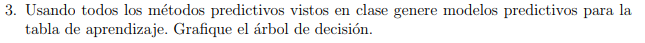

In [24]:
#3 Aplicando KNN

# Primero sacar k

cantidad = X_train.shape[0]

k = math.sqrt(cantidad)

k = math.trunc(k)

instancia_knn = KNeighborsClassifier(n_neighbors=k)

instancia_knn.fit(X_train,y_train)

print("Las predicciones en Testing son: {}".format(instancia_knn.predict(X_test)))

print("Precisión en Testing: {:.2f}".format(instancia_knn.score(X_test, y_test)))

Las predicciones en Testing son: [1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0
 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1
 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0
 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0]
Precisión en Testing: 0.85


C:\Users\Andrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]


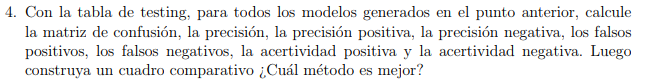

In [28]:
def indices_general(MC, nombres = None):
    precision_global = np.sum(MC.diagonal()) / np.sum(MC)
    error_global = 1 - precision_global
    precision_categoria  = pd.DataFrame(MC.diagonal()/np.sum(MC,axis = 1)).T
    if nombres!=None:
        precision_categoria.columns = nombres
    return {"Matriz de Confusión":MC, 
            "Precisión Global":precision_global, 
            "Error Global":error_global, 
            "Precisión por Categoría":precision_categoria}

In [29]:
indices = indices_general(MC,list(np.unique(y)))
    
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[176  21]
 [ 27 103]]

Precisión Global:
0.8532110091743119

Error Global:
0.14678899082568808

Precisión por Categoría:
          0         1
0  0.893401  0.792308


In [30]:
#Extrayendo precisiones

def precisiones(MC):
    VN = MC[0][0]
    FP = MC[0][1]
    FN = MC[1][0]
    VP = MC[1][1]
    
    return {"Precision Global": (VN + VP) / (VN + FP + FN + VP), 
            "Precisión Positiva": VP / (FN + VP), 
            "Precisión Negativa": VN / (VN + FP), 
            "Precisión Falsos Positivos": FP / (VN + FP),
            "Precisión Falsos Negativos": FN / (VP + FN),
            "Asertividad Positiva": VP / (FP + VP),
            "Asertividad Negativa": VN / (FN + VN)}
p = precisiones(MC)

for k in p:
    print("\n%s:\n%s"%(k,str(p[k])))


Precision Global:
0.8532110091743119

Precisión Positiva:
0.7923076923076923

Precisión Negativa:
0.8934010152284264

Precisión Falsos Positivos:
0.1065989847715736

Precisión Falsos Negativos:
0.2076923076923077

Asertividad Positiva:
0.8306451612903226

Asertividad Negativa:
0.8669950738916257
